# Tuning results

In [ ]:
%cd ..

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

In [2]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['legend.fontsize'] = 12

In [3]:
pd.set_option('display.max_rows', None)  # display all rows.
pd.set_option('display.float_format', '{:.2f}'.format)  # two decimals.

plt.style.use('grayscale')

%matplotlib inline

In [4]:
PROPS = {
    'boxprops':{'facecolor':'black', 'edgecolor':'black'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    'showfliers': False,
}

In [5]:
operators = ["heuristic",  # the full heuristic, so with all operators
             "random_activities", 
             "random_learners", 
             "regret_learners", 
             "smallest_activities",
             "break_out", 
             "greedy_insert", 
             "reinsert_learner"]

## Quality

As percentage gap w.r.t. the optimal solutions.

In [6]:
op_qual_opt = pd.read_csv(f"cache/tuning-ilp.csv", index_col="instance")
op_qual_opt.head()

,objective,bounds,iterations,run-time (wall),instruction (# learners),self-study (# learners),activities (#),instruction activity sizes,self-study activity sizes
instance,,,,,,,,,
1,4751.08,"[4751.075999999999, 4751.413272727272]",26,20.84,790,10,68,"[10, 14, 11, 16, 8, 5, 14, 11, 11, 10, 12, 10,...",[10]
2,7327.96,"[7327.955999999999, 7328.6455666666625]",28,71.16,1193,7,104,"[13, 16, 14, 12, 5, 14, 5, 15, 5, 15, 5, 14, 5...",[7]
3,9852.15,"[9852.147, 9852.803315756804]",46,92.85,1593,7,127,"[16, 9, 5, 16, 8, 16, 7, 16, 13, 16, 5, 16, 10...",[7]
4,4912.84,"[4912.841999999999, 4912.841999999999]",50,25.28,751,49,69,"[12, 11, 6, 11, 13, 10, 13, 10, 9, 12, 11, 7, ...","[16, 16, 12, 5]"
5,7363.67,"[7363.6725, 7364.382083333336]",28,60.65,1171,29,99,"[12, 5, 13, 5, 15, 5, 14, 16, 14, 5, 16, 5, 16...","[16, 13]"


In [7]:
def create_df():
    data = []
    
    for op in operators:
        op_df = pd.read_csv(f"cache/tuning-{op}.csv", index_col="instance")
        op_df["op"] = op
        op_df["gap"] = 100 * (op_qual_opt.objective - op_df.objective) / op_df.objective
        
        data.append(op_df)
        
    return pd.concat(data)
        

op_qual = create_df()
op_qual.head()

,objective,bounds,iterations,run-time (wall),instruction (# learners),self-study (# learners),activities (#),instruction activity sizes,self-study activity sizes,gap (10 min),op,gap
instance,,,,,,,,,,,,
1,4734.57,"[4734.569500000001, inf]",25000,97.97,791,9,64,"[15, 16, 13, 14, 14, 15, 16, 12, 13, 16, 16, 1...",[9],inf,heuristic,0.35
2,7256.07,"[7256.067999999999, inf]",25000,126.26,1184,16,97,"[16, 16, 16, 14, 16, 10, 14, 16, 14, 15, 15, 1...",[16],inf,heuristic,0.99
3,9705.05,"[9705.052500000002, inf]",25000,178.04,1577,23,132,"[16, 15, 16, 16, 16, 16, 16, 16, 15, 15, 16, 1...",[23],inf,heuristic,1.52
4,4904.57,"[4904.574, inf]",25000,94.90,748,52,65,"[12, 16, 15, 15, 12, 14, 12, 16, 11, 15, 15, 1...",[52],inf,heuristic,0.17
5,7331.76,"[7331.756749999998, inf]",25000,136.51,1159,41,104,"[16, 15, 16, 16, 16, 15, 16, 12, 11, 16, 16, 1...",[41],inf,heuristic,0.44


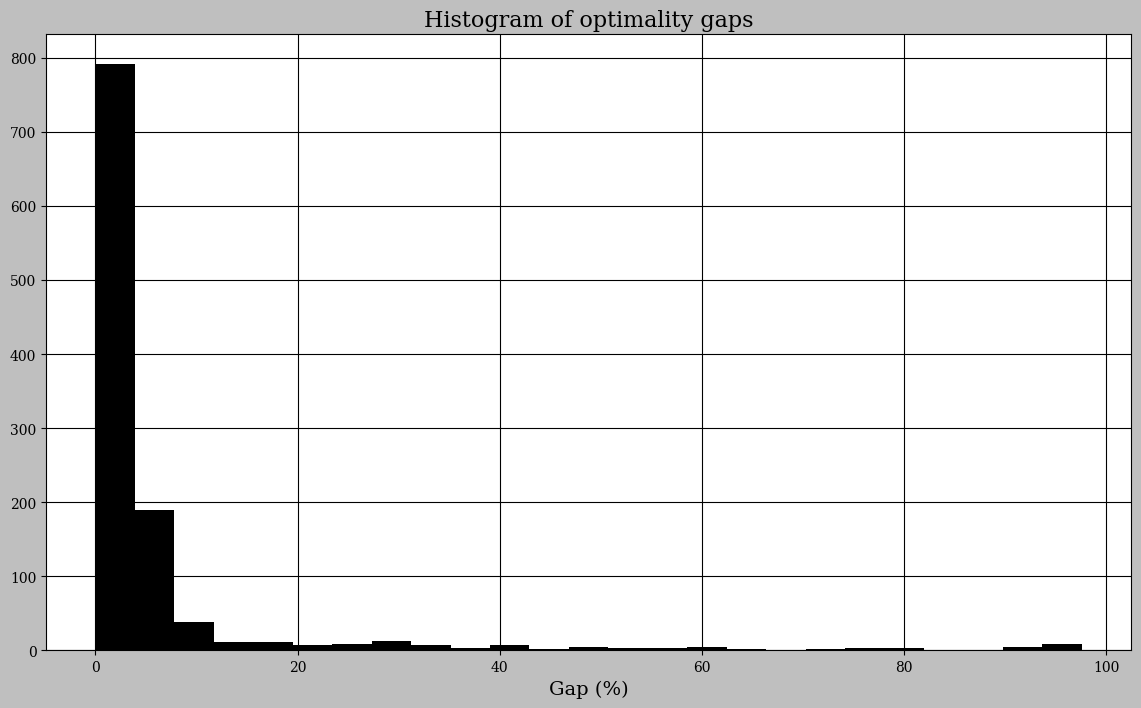

In [8]:
ax = op_qual.gap.hist(bins=25, figsize=(14, 8))
ax.set_xlabel("Gap (%)")
ax.set_title("Histogram of optimality gaps");

In [9]:
print(round(min(op_qual.gap), 2))  # just to be sure this is >= 0

-0.0


In [10]:
op_blocks = [['heuristic'],
             ['random_activities', 'random_learners', 'regret_learners', 'smallest_activities'],
             ['break_out', 'greedy_insert'],
             ['reinsert_learner']]

nice_op_blocks = [['Full'],
                  ["Random activities", 
                   "Random learners",
                   "Worst regret learners",
                   "Smallest activities"],
                  ["Break out", "Greedy insert"],
                  ["Reinsert learner"]]

ylabels = ["", "Destroy", "Repair", "LS"]

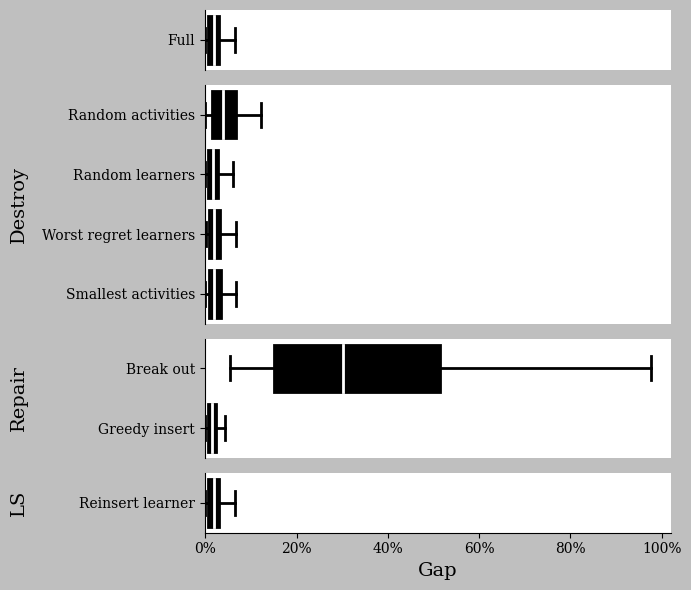

In [11]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(7, 6), sharex=True)

gs = gridspec.GridSpec(4, 1, height_ratios=[1/4, 4/4, 1/2, 1/4])
axes[0] = plt.subplot(gs[0])
axes[1] = plt.subplot(gs[1])
axes[2] = plt.subplot(gs[2])
axes[3] = plt.subplot(gs[3])

for ax, op_block, nice_op_block, ylabel in zip(axes, op_blocks, nice_op_blocks, ylabels):
    sns.boxplot(y='op', x='gap', orient='h',
                data=op_qual[op_qual.op.isin(op_block)], ax=ax, **PROPS)

    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    if ax is not axes[-1]:
        ax.set_xlabel("")
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
    else:
        ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

    ax.set_xlim([-.1, 102])
    ax.set_ylabel(ylabel, labelpad=10)
    ax.set_yticklabels(nice_op_block)

fig.align_labels()
    
plt.xlabel("Gap")
plt.tight_layout()
plt.savefig("out/qual_gaps.pdf", bbox_inches='tight');    

Mean gap when excluding the named operator:

In [12]:
op_qual.groupby(op_qual.op).gap.mean()

op
break_out             37.05
greedy_insert          1.64
heuristic              2.25
random_activities      4.09
random_learners        2.05
regret_learners        2.30
reinsert_learner       2.25
smallest_activities    2.43
Name: gap, dtype: float64

## Run-times

In [13]:
experiments = pd.read_csv("experiments/experiments.csv", index_col="index")

op_qual_times = op_qual.join(experiments)
op_qual_times.head()

,objective,bounds,iterations,run-time (wall),instruction (# learners),self-study (# learners),activities (#),instruction activity sizes,self-study activity sizes,gap (10 min),...,instances,penalty,min_batch,max_batch,progress,preferences,qualifications,split,courses,modules
1,4734.57,"[4734.569500000001, inf]",25000,97.97,791,9,64,"[15, 16, 13, 14, 14, 15, 16, 12, 13, 16, 16, 1...",[9],inf,...,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
1,4725.29,"[4725.289000000001, inf]",25000,88.79,787,13,66,"[15, 15, 16, 16, 14, 14, 15, 15, 14, 16, 16, 1...",[13],inf,...,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
1,4730.87,"[4730.873000000002, inf]",25000,94.09,788,12,66,"[16, 14, 14, 12, 16, 16, 13, 12, 13, 13, 14, 1...",[12],inf,...,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
1,4676.59,"[4676.589, inf]",25000,92.56,783,17,69,"[16, 11, 12, 16, 15, 11, 16, 10, 14, 15, 15, 1...",[17],inf,...,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48
1,4692.03,"[4692.027, inf]",25000,91.17,787,13,79,"[9, 16, 12, 8, 11, 9, 11, 6, 7, 5, 16, 16, 15,...",[13],inf,...,1,0.50,5,30,0,2,"(1, 0, 0)",True,"[(4, 1), (4, 1), (3, 1), (4, 1), (2, 1), (1, 2...",48


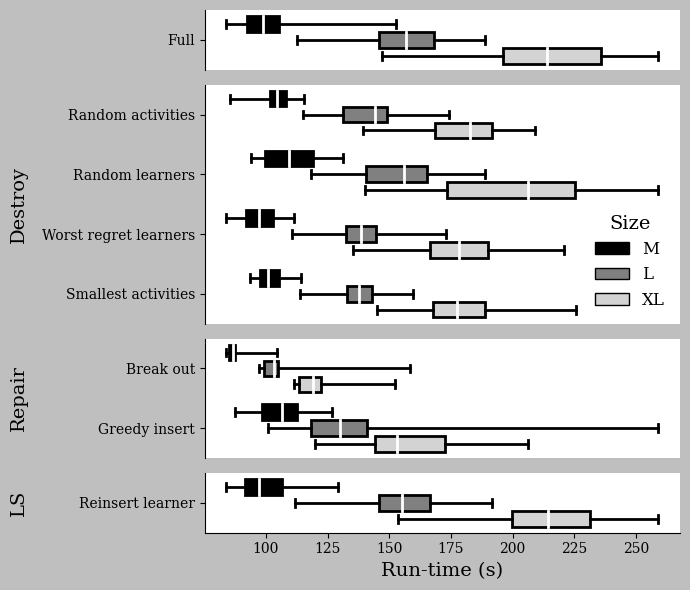

In [14]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(7, 6), sharex=True)

gs = gridspec.GridSpec(4, 1, height_ratios=[1/4, 4/4, 1/2, 1/4])
axes[0] = plt.subplot(gs[0])
axes[1] = plt.subplot(gs[1])
axes[2] = plt.subplot(gs[2])
axes[3] = plt.subplot(gs[3])

for ax, op_block, nice_op_block, ylabel in zip(axes, op_blocks, nice_op_blocks, ylabels):
    sns.boxplot(y='op', x='run-time (wall)', orient='h', hue='learners',  medianprops={'color':'white'},
                data=op_qual_times[op_qual_times.op.isin(op_block)], ax=ax, whis=(0, 100),
                palette={800: 'black', 1200: 'grey', 1600: 'lightgrey'})

    if ax is axes[1]:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(title="Size", handles=handles, labels=["M", "L", "XL"], frameon=False)
    else:
        ax.get_legend().remove()

    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    if ax is not axes[-1]:
        ax.set_xlabel("")
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(
                    axis='x',          # changes apply to the x-axis
                    which='both',      # both major and minor ticks are affected
                    bottom=False,      # ticks along the bottom edge are off
                    top=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off

    ax.set_ylabel(ylabel, labelpad=10)
    ax.set_yticklabels(nice_op_block)

fig.align_labels()
    
plt.xlabel("Run-time (s)")
plt.tight_layout()
plt.savefig("out/qual_runtimes.pdf", bbox_inches='tight');